# Main file for thesis project

Ie the top level script which runs the whole `pic -> recognise -> aim gimbal -> repeat` show

In [2]:
#!/usr/bin/python3
# top level script to run the show
import time
import PIL.Image

# TODO: add the EKF
# TODO: add the control stuff

# from image_classifier import ImageClassifier
# import gimbal_control as gc
# from extended_kalman_filter import ExtendedKalmanFilter

# classifier = ImageClassifier()  # done but not tested
# EKF = ExtendedKalmanFilter()    # not done, not tested
# SBGC = GimbalController()       # done, needs to be repackaged and tested

# while True:
#     pic = take_picture()

# 	obj_position = run_through_ncs(pic)
	
# 	# while the nn recognises the image (approx 80ms),
# 	# do other stuff:
	
# 	angles = get_angles_from_gimbal()

# 	states = EKF(obj_position, angles)
	
# 	control_action = controller(states)
	
# 	command_gimbal(control_action)


In [7]:
import image_classifier

## Image Classifier

In [1]:
import image_classifier
from image_classifier import ImageClassifier

In [3]:
IC = ImageClassifier(graph_file='../Models/MobileNet_SSD_caffe/graph',
                     label_file='../Models/MobileNet_SSD_caffe/categories.txt')

In [27]:
img_array = IC.take_picture_and_start_inference()
output_dict, bb, bb_scaled, inference_time_ms = IC.get_inference_result()

print(output_dict)
print(bb)
print(bb_scaled)
print(inference_time_ms)

{'detection_boxes_0': [(400, 170), (477, 277)], 'detection_scores_0': 93, 'detection_classes_0': 9, 'detection_boxes_1': [(220, 68), (480, 514)], 'detection_classes_1': 15, 'detection_scores_1': 97, 'num_detections': 2}
((68, 220), (514, 480))
((-0.39375, -0.041666666666666685), (0.303125, 0.5))
80.12585


/usr/local/lib/python3.5/dist-packages/mvnc/mvncapi.py:418: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  tensor = numpy.fromstring(tensor.raw, dtype=numpy.float32)


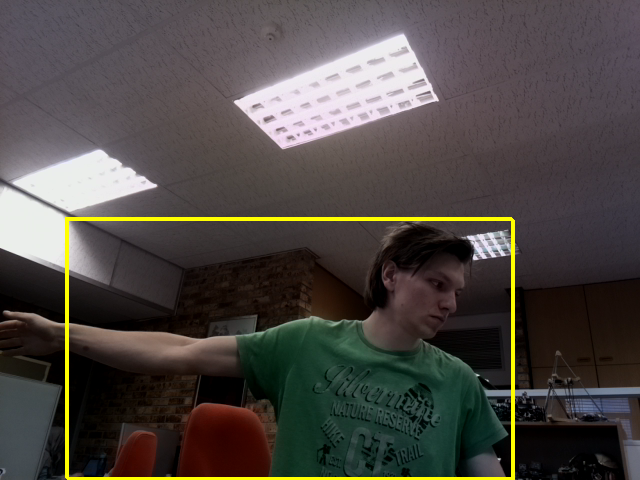

In [28]:
if bb == -1:
    img = PIL.Image.fromarray(img_array)
else:
    (x1, y1), (x2, y2) = bb
    img = PIL.Image.fromarray(img_array)
    img = PIL.Image.fromarray(image_classifier.draw_bounding_box(y1, x1, y2, x2, img_array))

img

## Gimbal Controller

In [19]:
import gimbal_control as gc

In [12]:
gc.turn_off_motors()

bytearray(b'>E\x01F\x0c\x0c')

In [13]:
gc.turn_on_motors()

bytearray(b'>E\x01F\x0b\x0b')

In [16]:
gc.send_angle_command(0, 0, 20)

bytearray(b'>C\rP\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x8e\x03\x93')

In [17]:
angles = gc.get_motor_angles()
print('Roll = %d, pitch = %d, yaw = %d' % (angles['roll'], angles['pitch'], angles['yaw']))

Roll = -8, pitch = 0, yaw = 19


## A Basic Loop

In [1]:
from image_classifier import ImageClassifier
import gimbal_control as gc

IC = ImageClassifier(graph_file='../Models/MobileNet_SSD_caffe/graph',
                     label_file='../Models/MobileNet_SSD_caffe/categories.txt')

In [32]:
x_target = 0

while True:
    print('.',end='')
    img_array = IC.take_picture_and_start_inference()
    output_dict, bb, bb_scaled, inference_time_ms = IC.get_inference_result()

    if bb_scaled == -1:
        img = PIL.Image.fromarray(img_array)
    else:
        (x1, y1), (x2, y2) = bb
        img = PIL.Image.fromarray(img_array)
        img = PIL.Image.fromarray(image_classifier.draw_bounding_box(y1, x1, y2, x2, img_array))

        (x1, y1), (x2, y2) = bb_scaled
        x_target += (x1+x2)/2
        x_target = max(-20, min(20, x_target))
        gc.send_angle_command(0, 0, x_target)
    time.sleep(0.1)
img

.

KeyboardInterrupt: 